In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


/home/test/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any be

In [2]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('iri.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('iri-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('iri-cleaned.csv')

any nan = False
all finite = True


In [3]:
# Take a quick look at the dataset
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0800,0.000,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1.13
1,0.00,0.00,0.56,0.00,0.15,0.15,0.42,0.0600,0.000,0.000,...,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.00,0.0,3.75
2,0.00,0.66,0.00,0.32,0.00,0.00,0.00,0.0000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,0.11,0.66,0.0,3.48
3,0.25,0.00,0.00,0.00,0.15,0.00,0.00,1.1906,0.662,0.021,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2.85
4,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.0000,0.000,0.210,...,0.0,0.0,0.0,0.0,0.15,0.66,0.00,0.66,0.0,3.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      283 non-null    float64
 1   A2      283 non-null    float64
 2   A3      283 non-null    float64
 3   B1      283 non-null    float64
 4   B2      283 non-null    float64
 5   B3      283 non-null    float64
 6   C1      283 non-null    float64
 7   C2      283 non-null    float64
 8   C3      283 non-null    float64
 9   D1      283 non-null    float64
 10  D2      283 non-null    float64
 11  D3      283 non-null    float64
 12  E1      283 non-null    float64
 13  E2      283 non-null    float64
 14  E3      283 non-null    float64
 15  F1      283 non-null    float64
 16  F2      283 non-null    float64
 17  F3      283 non-null    float64
 18  G1      283 non-null    float64
 19  G2      283 non-null    float64
 20  G3      283 non-null    float64
 21  H1      283 non-null    float64
 22  H2

In [5]:
df.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.108028,0.287707,0.188396,0.088428,0.238112,0.196039,0.286810,0.420558,0.422391,0.156677,...,0.032488,0.019943,0.023406,0.033322,0.066385,0.079119,0.064194,0.194325,0.103548,5.070177
std,0.350276,0.692493,0.401664,0.291426,0.541783,0.519295,0.445617,0.635761,0.941914,0.277142,...,0.128503,0.064099,0.101855,0.134067,0.194555,0.216522,0.228117,0.528566,0.336929,2.633501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.950000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.145000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000
75%,0.000000,0.235000,0.165000,0.000000,0.150000,0.150000,0.485000,0.600000,0.600000,0.205750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.560000
max,2.500000,7.650000,2.480000,2.100000,4.320000,4.560000,3.010000,4.320000,12.500000,1.800000,...,1.200000,0.620000,1.010000,1.200000,1.620000,2.000000,2.220000,3.200000,3.080000,16.250000


#### Creation of Linear Regression Objects

In [6]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



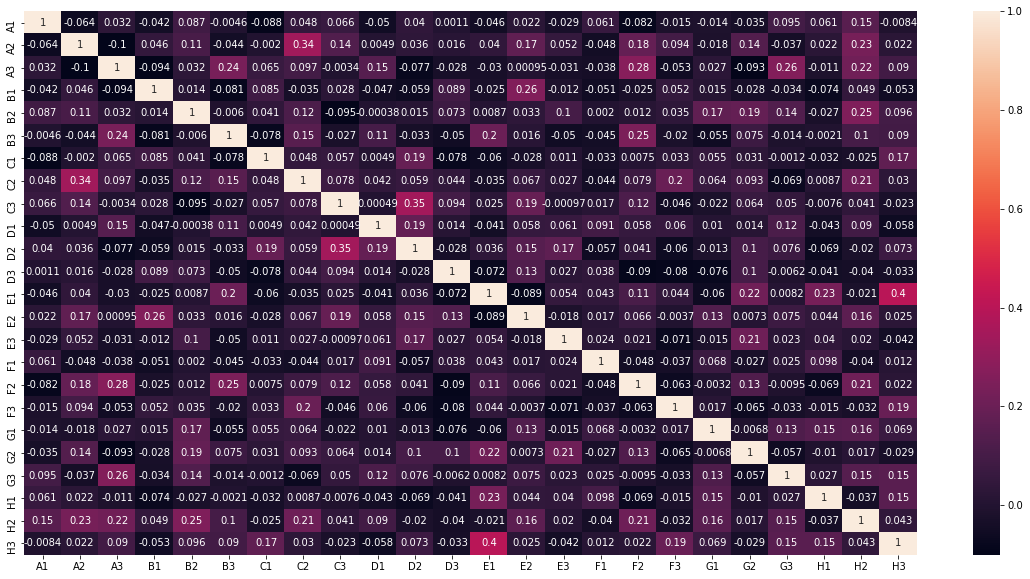

In [7]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [8]:

# sns.pairplot(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=25)

In [10]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [11]:
  
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=16)

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)

print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")


test_r2 = 0.5047813879824847
train_r2 = 0.5779951106820418


#### Printing the individual $\beta$ values

In [12]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ 4.28740829e-01  5.02385570e-01  1.77775583e+00  6.24847990e-01
  2.74286817e-01  2.19221392e-01  9.51602462e-01 -2.03181004e-01
  4.54866321e-01  6.85516943e-01  1.92223443e-01  1.43662403e+00
  2.41618718e-01 -1.52834095e-01  3.85467317e-01  4.64776458e+00
  6.45936834e+00  1.13713269e+01  1.67320257e-01  2.50429431e-02
  9.01654522e-01 -2.31454934e-03  3.05393473e-01  5.06011169e-01]
Intercept: 2.764111882832435


[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'test IRI predicted vs target')]

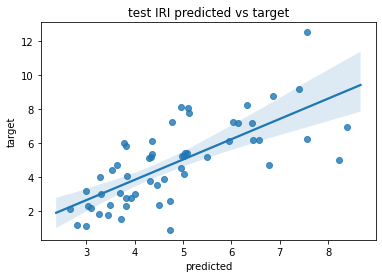

In [13]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=x_test_prediction, y=y_test)
ax.set(title = 'test IRI predicted vs target', xlabel='predicted', ylabel='target')

[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'train IRI predicted vs target')]

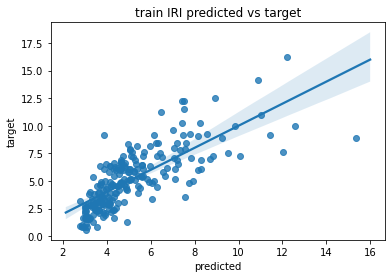

In [14]:
x_train_prediction = multi_linear.predict(X_train)
ax = sns.regplot(x=x_train_prediction, y=y_train,)
ax.set(title = 'train IRI predicted vs target', xlabel='predicted', ylabel='target')



In [15]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
